# Madi Joyal

## Research question/interests

Research Question: is there a connection between parental education status and alcohol consumption? I chose this question because I am the first in my family to get their undergraduate degree. I want to know whether a low parental education status gives their children a higher likelihood of drinking alcohol during adolescence. I'd also love to whether mothers' or fathers' education statuses influence their child's alcohol consumption more.

In [250]:
# My Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [251]:
#Task 1
## First I am merging my two datasets from the two classes interviewed for this dataset. And then, I am taking a broad look at all of my data.
df1 = pd.read_csv('../data/raw/student-mat.csv')
df2 = pd.read_csv('../data/raw/student-por.csv')
df = pd.merge(df1,df2, how = "outer")
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1044 non-null   int64 
 1   school      1044 non-null   object
 2   sex         1044 non-null   object
 3   age         1044 non-null   int64 
 4   address     1044 non-null   object
 5   famsize     1044 non-null   object
 6   Pstatus     1044 non-null   object
 7   Medu        1044 non-null   int64 
 8   Fedu        1044 non-null   int64 
 9   Mjob        1044 non-null   object
 10  Fjob        1044 non-null   object
 11  reason      1044 non-null   object
 12  guardian    1044 non-null   object
 13  traveltime  1044 non-null   int64 
 14  studytime   1044 non-null   int64 
 15  failures    1044 non-null   int64 
 16  schoolsup   1044 non-null   object
 17  famsup      1044 non-null   object
 18  paid        1044 non-null   object
 19  activities  1044 non-null   object
 20  nursery 

(1044, 34)

In [252]:
df.describe()

,Unnamed: 0,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,276.949234,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,174.819941,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,1.000000,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,131.000000,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,261.500000,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,392.000000,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,649.000000,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [253]:
df.shape

(1044, 34)

In [254]:
df.nunique(axis=0)

Unnamed: 0    649
school          2
sex             2
age             8
address         2
famsize         2
Pstatus         2
Medu            5
Fedu            5
Mjob            5
Fjob            5
reason          4
guardian        3
traveltime      4
studytime       4
failures        4
schoolsup       2
famsup          2
paid            2
activities      2
nursery         2
higher          2
internet        2
romantic        2
famrel          5
freetime        5
goout           5
Dalc            5
Walc            5
health          5
absences       35
G1             18
G2             17
G3             19
dtype: int64

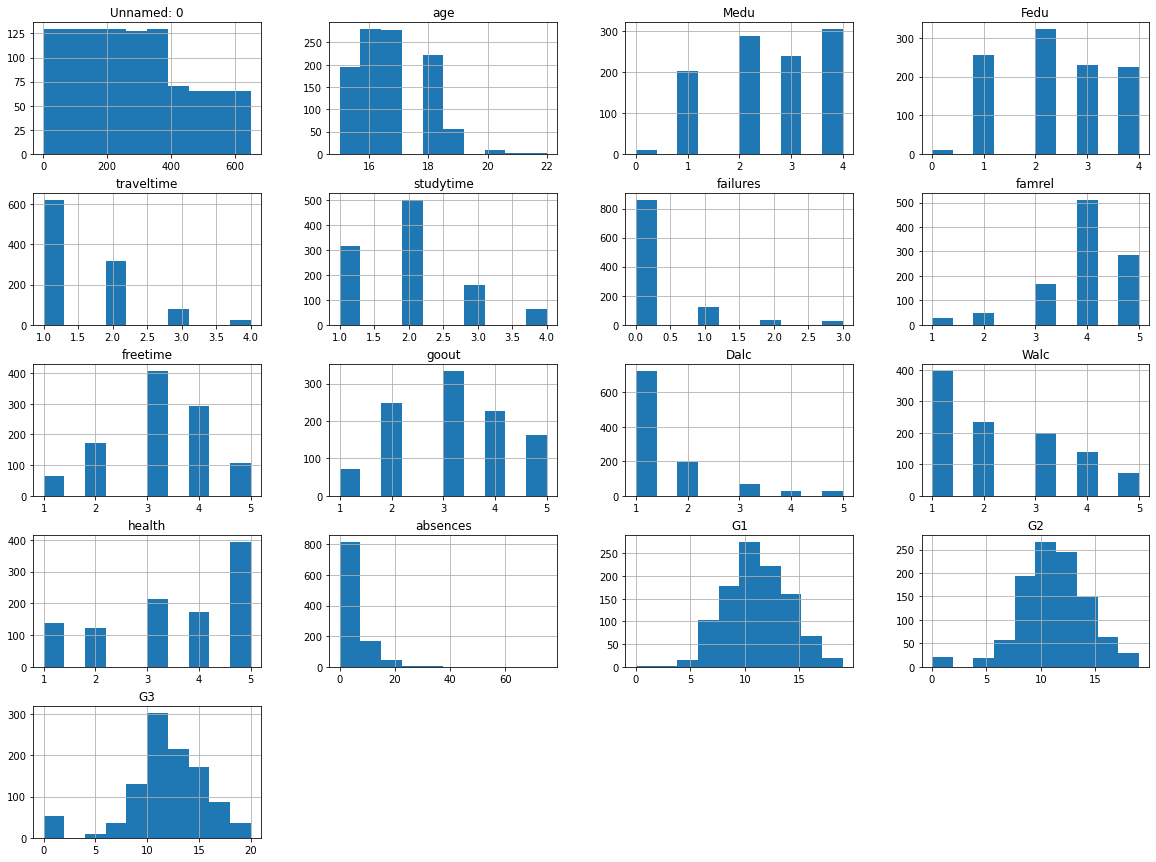

In [255]:
#Looking at histograms of all the columns with integers within my dataset.
#These visual representations helped me understand my data and helped me find outliers later in the EDA process.
hist = df.hist(bins=10,figsize =(20,15))

In [256]:
#Cleaning my Dataset

##Removing Outliers
df_cleaned = df.copy()
df_cleaned = df_cleaned[df_cleaned['age'].between(15, 19)]
df_cleaned = df_cleaned[df_cleaned['absences'] < 20]
df_cleaned = df_cleaned[df_cleaned['studytime'] < 60]
df_cleaned.shape
df_cleaned

#Prior to cleaning, my dataset had 1044 rows and 54 columns. Now it has 1004 rows and 54 columns. 

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,GP,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,6,5,6,6
1,2,GP,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,4,5,5,6
2,3,GP,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,10,7,8,10
3,4,GP,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,2,15,14,15
4,5,GP,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,645,MS,F,19,R,GT3,T,2,3,services,...,5,4,2,1,2,5,4,10,11,10
1040,646,MS,F,18,U,LE3,T,3,1,teacher,...,4,3,4,1,1,1,4,15,15,16
1041,647,MS,F,18,U,GT3,T,1,1,other,...,1,1,1,1,1,5,6,11,12,9
1042,648,MS,M,17,U,LE3,T,3,1,services,...,2,4,5,3,4,2,6,10,10,10


In [257]:
##Checking my dataset for null values

df_cleaned = df_cleaned.dropna(axis=0)
df_cleaned.shape
#Since the row and column numbers stayed the same, we know that there are no null values in this dataset.

(1004, 34)

[Text(0.5, 1.0, 'Countplot for Workday Alcohol Consumption')]

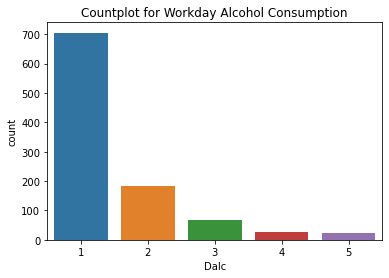

In [258]:
#Focusing on one variable: Workday alcohol consumption (Dalc)

sns.countplot(data = df_cleaned, x = 'Dalc').set(title= "Countplot for Workday Alcohol Consumption")

(<AxesSubplot:title={'center':'Comparing Fedu to Medu via Histogram'}, xlabel='Education Level', ylabel='Frequency'>,
 [Text(0.5, 1.0, 'Comparing Fedu to Medu via Histogram'),
  Text(0.5, 0, 'Education Level')])

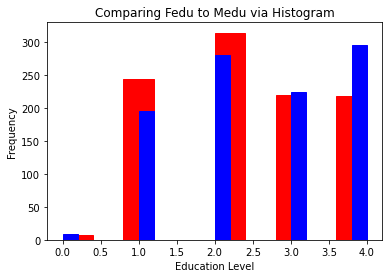

In [259]:
histo1 = df_cleaned['Fedu'].plot(kind='hist', bins=10, facecolor='red',edgecolor='red')
histo2 = df_cleaned['Medu'].plot(kind='hist', bins=20, facecolor='blue',edgecolor='blue')
histo1, histo2.set(title = "Comparing Fedu to Medu via Histogram", xlabel = "Education Level")

In [260]:
##From this Histogram, you can see that the mothers have a higher education level on average than the fathers used in this dataset.

[Text(0.5, 1.0, 'Number of Students at Each Age')]

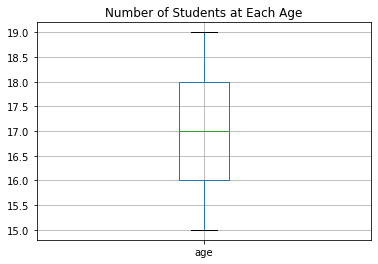

In [261]:
#Focusing on one variable: Age of students (age)
AgeBox = df_cleaned.boxplot('age').set(title='Number of Students at Each Age')
AgeBox

[Text(0.5, 1.0, 'Number of Students at Each Age'),
 Text(0, 0.5, 'Age'),
 Text(0.5, 0, 'Number of Students')]

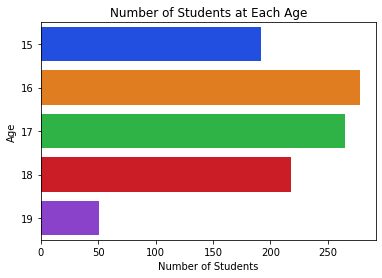

In [262]:
AgeCount = sns.countplot(data=df_cleaned, y="age", palette = "bright").set(title='Number of Students at Each Age', ylabel = "Age", xlabel = "Number of Students")
AgeCount

In [263]:
#Task2

In [264]:
# My Import Libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [265]:
#Loading my Data

df1 = pd.read_csv('../data/raw/student-mat.csv')
df2 = pd.read_csv('../data/raw/student-por.csv')
df = pd.merge(df1,df2, how = "outer")
df.info()
df.describe()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1044 non-null   int64 
 1   school      1044 non-null   object
 2   sex         1044 non-null   object
 3   age         1044 non-null   int64 
 4   address     1044 non-null   object
 5   famsize     1044 non-null   object
 6   Pstatus     1044 non-null   object
 7   Medu        1044 non-null   int64 
 8   Fedu        1044 non-null   int64 
 9   Mjob        1044 non-null   object
 10  Fjob        1044 non-null   object
 11  reason      1044 non-null   object
 12  guardian    1044 non-null   object
 13  traveltime  1044 non-null   int64 
 14  studytime   1044 non-null   int64 
 15  failures    1044 non-null   int64 
 16  schoolsup   1044 non-null   object
 17  famsup      1044 non-null   object
 18  paid        1044 non-null   object
 19  activities  1044 non-null   object
 20  nursery 

(1044, 34)

In [266]:
df1 = pd.read_csv('../data/raw/student-mat.csv')
df2 = pd.read_csv('../data/raw/student-por.csv')
df= pd.merge(df1,df2, how = "outer")
df

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,GP,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,6,5,6,6
1,2,GP,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,4,5,5,6
2,3,GP,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,10,7,8,10
3,4,GP,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,2,15,14,15
4,5,GP,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,645,MS,F,19,R,GT3,T,2,3,services,...,5,4,2,1,2,5,4,10,11,10
1040,646,MS,F,18,U,LE3,T,3,1,teacher,...,4,3,4,1,1,1,4,15,15,16
1041,647,MS,F,18,U,GT3,T,1,1,other,...,1,1,1,1,1,5,6,11,12,9
1042,648,MS,M,17,U,LE3,T,3,1,services,...,2,4,5,3,4,2,6,10,10,10


In [285]:
#I am ensuring that there are no duplicates from merging the math and portuguese class datasets

if len(df[df.duplicated()]) > 0:
    print("Number of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("Number duplicated entries found")

Number duplicated entries found


In [276]:
#I am removing the columns that are irrelevant to my research questions:
cleandf = df.copy().drop(['school','sex', 'famsup', 'age', 'guardian', 'address', 'famsize', 'famrel', 'freetime', 'goout', 'Mjob', 'Fjob', 'reason', 'G1', 'G2', 'G3', 'romantic', 'internet', 'higher', 'nursery', 'activities', 'paid', 'absences', 'health', 'traveltime', 'studytime', 'failures', 'schoolsup'], axis=1).dropna(axis=0)
cleandf

,Unnamed: 0,Pstatus,Medu,Fedu,Dalc,Walc
0,1,A,4,4,1,1
1,2,T,1,1,1,1
2,3,T,1,1,2,3
3,4,T,4,2,1,1
4,5,T,3,3,1,2
...,...,...,...,...,...,...
1039,645,T,2,3,1,2
1040,646,T,3,1,1,1
1041,647,T,1,1,1,1
1042,648,T,3,1,3,4


In [286]:
# I am now renaming the "Unnamed: 0" column to "Student#" as the previous name says nothing about the column.

cleandf = cleandf.rename(columns={'Unnamed: 0':'StudentNum'})
cleandf

,StudentNum,Pstatus,Medu,Fedu,Dalc,Walc,Pedu
0,1,A,4,4,1,1,4.0
1,2,T,1,1,1,1,1.0
2,3,T,1,1,2,3,1.0
3,4,T,4,2,1,1,3.0
4,5,T,3,3,1,2,3.0
...,...,...,...,...,...,...,...
1039,645,T,2,3,1,2,2.5
1040,646,T,3,1,1,1,2.0
1041,647,T,1,1,1,1,1.0
1042,648,T,3,1,3,4,2.0


In [291]:
#Creating a column of Medu (maternal education) and Fedu (paternal education) merged and then averaged
#This new column = Parental Education (Pedu)

cleandf['Pedu'] = ((df.Medu.astype(int) + df.Fedu.astype(int))/2)


#I am also combining the Dalc and Walc columns to measure the overall alcohol consumption per week of each student.
cleandf['Alc'] = ((df.Walc.astype(int)/(2/7)) + (df.Dalc.astype(int)/(5/7)))

cleandf

,StudentNum,Pstatus,Medu,Fedu,Dalc,Walc,Pedu,Alc
0,1,A,4,4,1,1,4.0,4.9
1,2,T,1,1,1,1,1.0,4.9
2,3,T,1,1,2,3,1.0,13.3
3,4,T,4,2,1,1,3.0,4.9
4,5,T,3,3,1,2,3.0,8.4
...,...,...,...,...,...,...,...,...
1039,645,T,2,3,1,2,2.5,8.4
1040,646,T,3,1,1,1,2.0,4.9
1041,647,T,1,1,1,1,1.0,4.9
1042,648,T,3,1,3,4,2.0,18.2
